In [10]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import k_clique_communities
import pandas as pd

allCategories = pd.read_csv("../categories.csv", index_col=0)
G = nx.read_gml("../GraphMissingEdges.gml")
print(nx.info(G))

Graph with 11080 nodes and 52990 edges


1- Utilizando a rede do desafio:
a) Itendifique comunidades usando o método Leiden ou Louvain.

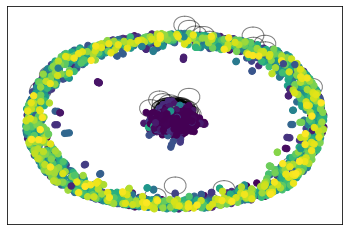

In [6]:
# load the karate club graph
# G = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

b) Identifique comunidades utilizando o k-clique. Utilize k=4.

In [12]:
kclique = k_clique_communities(G,4)
kclique = list(kclique)
# print(kclique[0])

print(str(len(kclique)) + " clusters")

# for each cluster
for cluster in kclique:
    # for each item inside cluster
    for item in cluster:
        cats = G.nodes[item]['categories'].split(",")
        categories = []
        for cat in cats:
            categories.append(allCategories.loc[int(cat)]['names'])
        
        # remove duplicates in categories
        res = []
        for i in categories:
            if i not in res:
                res.append(i)
    print("Categories: " + ", ".join(res))


144 clusters
Categories: Restaurants, Cafes, Coffee & Tea, Food, Breakfast & Brunch
Categories: Nightlife, Bars
Categories: Japanese, Restaurants, Sushi Bars
Categories: Breakfast & Brunch, Food, Comfort Food, Restaurants, Bakeries
Categories: Restaurants, Korean
Categories: Food, Coffee & Tea, Grocery
Categories: Restaurants, Gastropubs, Burgers, Barbeque
Categories: Hotels & Travel, Venues & Event Spaces, Event Planning & Services, Hotels
Categories: Coffee & Tea, Ice Cream & Frozen Yogurt, Bakeries, Food
Categories: Coffee & Tea, Ice Cream & Frozen Yogurt, Bakeries, Food
Categories: Canadian (New), Restaurants
Categories: Salad, Restaurants, Bars, Vegan, Nightlife, Tapas/Small Plates, Pizza, Vegetarian, Cocktail Bars
Categories: Restaurants, Vietnamese
Categories: Chinese, Restaurants
Categories: French, Breakfast & Brunch, Restaurants, Cafes, Bistros
Categories: Public Transportation, Hotels & Travel, Transportation, Train Stations, Landmarks & Historical Buildings, Public Services

c) Traduza os ids dos nós em cada cluster pelos nomes de suas categorias (referentes aos locais que
eles se referem). Os resultados parecem fazer sentido? Mostre um exemplo que ilustra a sua
resposta.

Com a utilizacao do algoritmo k-clique (k=4) para deteccao de comunidades foram detecadas 144 clusters e atraves deles foi possivel perceber o agrupamento de locais com categorias similares, como por exemplo as evidenciadas abaixo:

Uma delas se refere a locais com alimentos mais voltados para pessoas veganas e vegetarianas, mas que nao sao tao extremistas e tambem englobam a categoria restaurante que ficou bem generica e esta presenta na maioria dos clusters
Outro cluster agrupou locais voltados ao turismo aparentemente pois englobam hoteis, transportes e predios historicos.

Apesar dos outros dois exemplos evidenciarem lanchonetes e locais de jogos respectivamente, uma outra coisa que chamou a atencao foram os inumeros clusters identicos ou similares, porem separados, isso leva a pensar que funcionam como se fossem os grupos de locais mas um pouco distantes geograficamente em uma cidade por exemplo.

Categories: Salad, Restaurants, Bars, Vegan, Nightlife, Tapas/Small Plates, Pizza, Vegetarian, Cocktail Bars
Categories: Public Transportation, Hotels & Travel, Transportation, Train Stations, Landmarks & Historical Buildings, Public Services & Government
Categories: Restaurants, Cafes, Coffee & Tea, Food, Breakfast & Brunch
Categories: Party & Event Planning, Arts & Entertainment, Escape Games, Amusement Parks, Active Life, Challenge Courses, Arcades, Event Planning & Services
